In [32]:
import numpy as np
import umbridge
import pandas as pd

model = umbridge.HTTPModel("http://localhost:4243", "forward")

#estimation for the boundaries of each parameter
intervals = [(0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1),
             (0,1)]

#assume normal distribution
N = 100
temp_samples = [np.random.normal(ew, sd, size=N).tolist() for ew,sd in intervals]
observation_matrix = pd.DataFrame({})
for temp in temp_samples:
    observation_matrix = pd.concat([observation_matrix,pd.Series(temp)], axis=1)
observation_matrix = observation_matrix.T #observation matrix with samples in lines 

#Monte Carlo Simulation
mc_values = [model([observation_matrix[i].tolist()])[0][0] for i in range(0,N)]
mc_variance = np.var(mc_values)
mc_estimator = np.mean(mc_values)
print("Monte Carlo Estimator (mean of evaluations):", mc_estimator)
print("Standard deviation of Monte Carlo realisations: ", np.sqrt(mc_variance))
print("Example of an input vector: ", observation_matrix[0].tolist())

Monte Carlo Estimator (mean of evaluations): 0.1372259704306911
Standard deviation of Monte Carlo realisations:  1.7920227799073367
Example of an input vector:  [-0.502619253440107, 0.20042040061366065, -0.6536741390802687, -0.6947106867261661, 0.22018109005105305, -0.15129542260953058, 0.34052268505152794, -0.45616772689499635, 0.6577520694616747, 0.04606295211664564, -0.6146103093753296, 0.5881650714216047, -0.7889657447410281, -1.467637876771742]


In [33]:
#preparation of data, observations are in lines 
observation_matrix = observation_matrix.reset_index()
observation_matrix = observation_matrix.drop("index", axis=1)
observation_matrix = observation_matrix.T
observation_matrix[14] = mc_values
observation_matrix.columns = ['X{}'.format(i) for i in range(1, 15)] + ["Y"]


In [34]:
observation_matrix

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
0,-0.502619,0.200420,-0.653674,-0.694711,0.220181,-0.151295,0.340523,-0.456168,0.657752,0.046063,-0.614610,0.588165,-0.788966,-1.467638,-0.448227
1,-2.769639,-0.352053,-1.553820,0.898769,1.420062,1.395876,0.886623,-0.516753,0.301719,0.818628,-0.047359,0.108894,-0.916239,-0.991835,1.365344
2,0.278177,3.602550,-0.278626,0.885973,1.991885,-2.974180,1.213142,1.775888,-0.286470,-0.338684,-1.015460,-0.549587,-0.998064,-1.046423,4.149840
3,0.545046,1.659134,1.364944,1.863454,0.520919,0.889356,0.077209,-1.859160,0.562447,0.037074,-0.815449,-1.390435,1.551123,1.954879,3.559662
4,0.193978,0.046610,-1.726229,1.180058,0.593044,1.238494,0.221936,-0.029692,-0.455070,0.604498,0.415585,0.000265,-0.498461,1.196740,1.831166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.108039,-0.601618,0.109474,0.248302,1.811537,-1.115540,0.217216,0.174733,0.798956,-0.232878,-1.176048,-0.213106,0.341002,-1.486508,-0.586194
96,0.619822,0.096443,-0.887866,-1.423505,1.612515,0.777739,0.048163,-0.525532,-2.247906,0.125229,0.406226,1.928922,1.058346,0.202062,-1.201833
97,1.140037,0.360475,2.554708,-2.643190,-0.016020,1.487354,1.205464,1.421447,-1.144018,-0.639122,-0.762818,-0.170936,-0.310286,-0.763721,-2.921837
98,-0.296977,0.480326,0.455958,-0.586109,3.591226,0.210628,0.362203,0.865179,-0.887522,1.172722,1.330208,1.419237,0.223781,-1.237835,1.066938


In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Y ~ ' + ' + '.join(observation_matrix.columns[:13]), data=observation_matrix).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)

                sum_sq    df             F    PR(>F)
X1        5.804141e-29   1.0  1.831934e+01  0.000048
X2        9.117984e+01   1.0  2.877866e+31  0.000000
X3        9.663982e-30   1.0  3.050197e+00  0.084298
X4        1.047917e+02   1.0  3.307492e+31  0.000000
X5        7.094778e-32   1.0  2.239291e-02  0.881397
X6        1.971548e-30   1.0  6.222705e-01  0.432374
X7        5.824917e-29   1.0  1.838491e+01  0.000047
X8        6.620831e-31   1.0  2.089702e-01  0.648728
X9        1.063689e-29   1.0  3.357272e+00  0.070370
X10       7.249362e+01   1.0  2.288082e+31  0.000000
X11       1.092527e-30   1.0  3.448293e-01  0.558593
X12       3.462854e-31   1.0  1.092964e-01  0.741751
X13       3.056552e-31   1.0  9.647251e-02  0.756856
Residual  2.724750e-28  86.0           NaN       NaN


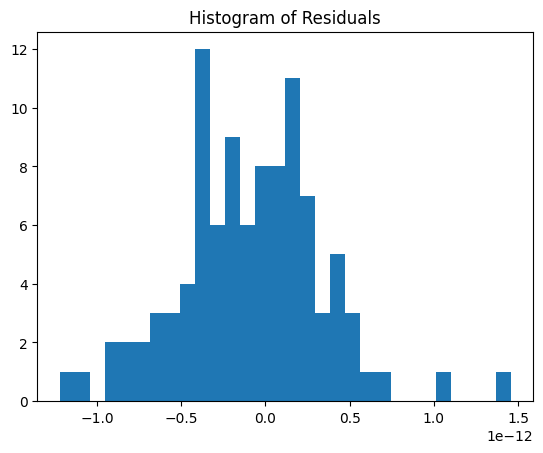

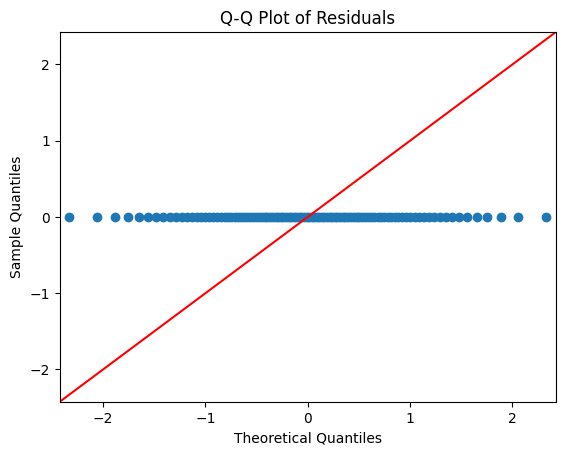

In [184]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residuen aus dem Modell
residuals = model.resid

# Histogramm der Residuen
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.show()

# Q-Q-Plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()